In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

In [2]:
x = np.loadtxt('../data/Ising2D_config_L30.dat.gz')
y = np.loadtxt('../data/Ising2D_labels_L30.dat')
temp = np.loadtxt('../data/Ising2D_temps_L30.dat')

In [3]:
# from IPython.display import clear_output,display
# from time import sleep

# fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))

# L = 30
# for i,cx in enumerate(x[::50]):

#     clear_output(wait=True)
#     fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))
#     img = ax.matshow(cx.reshape(L,L), cmap='binary')
#     ax.set_xticks([])
#     ax.set_yticks([])

#     ax.set_title(f'$T = {temp[50*i]:.1f}J$')
#     plt.pause(0.01)

#     plt.show()

# 1

# A

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80)

In [6]:
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size = 0.5)

In [7]:
y_train_hot = keras.utils.to_categorical(y_train,2)
y_test_hot = keras.utils.to_categorical(y_test,2)
y_validate_hot = keras.utils.to_categorical(y_validate,2)

# B


In [8]:
model = keras.Sequential(
[
    layers.Dense (50, input_shape = (len(x[0]), ), activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.20),
    layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                45050     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 90,652
Trainable params: 90,652
Non-trainable params: 0
____________________________________________________

In [9]:
batch_size = 32
epochs = 20

training = []
training = model.fit(x_train,y_train_hot, batch_size=batch_size, epochs=epochs, verbose = 1, validation_data=(x_test,y_test_hot))

Epoch 1/20
400/400 [==============================] - 3s 6ms/step - loss: 0.1047 - accuracy: 0.9601 - val_loss: 0.0351 - val_accuracy: 0.9906
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9918 - val_loss: 0.0531 - val_accuracy: 0.9819
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0234 - accuracy: 0.9913 - val_loss: 0.0213 - val_accuracy: 0.9931
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0096 - val_accuracy: 0.9956
Epoch 5/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0078 - val_accuracy: 0.9975
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0097 - val_accuracy: 0.9981
Epoch 7/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0219 - val_accuracy: 0.9919
Epoch 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


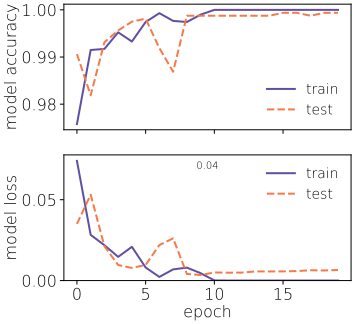

In [10]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

score = model.evaluate(x_validate, y_validate_hot, verbose=0)

ax[0].plot(training.history['accuracy'], color=colors[0])
ax[0].plot(training.history['val_accuracy'], ls='--', color=colors[-3])
ax[0].set_ylabel('model accuracy')
ax[0].legend(['train', 'test'], loc='best')
ax[0].text(0.5,0.95,f'{score[1]:.2f}',horizontalalignment='center', verticalalignment='top', transform=ax[1].transAxes)

ax[1].plot(training.history['loss'], color=colors[0])
ax[1].plot(training.history['val_loss'], ls='--', color=colors[-3])
ax[1].set_ylabel('model loss')
ax[1].set_xlabel('epoch')
ax[1].set_ylim(bottom=0)
ax[1].text(0.5,0.95,f'{score[0]:.2f}',horizontalalignment='center', verticalalignment='top', transform=ax[1].transAxes)
ax[1].legend(['train', 'test'], loc='best');

# C

# D

In [11]:
predictions_prob_train = model(x_train)
predictions_prob_test = model(x_test)

predictions_train = np.argmax(predictions_prob_train,axis=1)
predictions_test = np.argmax(predictions_prob_test,axis=1)

mistakes_train = np.where(predictions_train != y_train)[0]
mistakes_test = np.where(predictions_test != y_test)[0]

num_mistakes_train, num_mistakes_test = len(mistakes_train),len(mistakes_test)

print(f'Train Mistakes: {100*num_mistakes_train/x_train.shape[0]:.2f}%')
print(f'Test Mistakes: {100*num_mistakes_test/x_test.shape[0]:.2f}%')

Train Mistakes: 0.00%
Test Mistakes: 0.06%


# E

In [12]:
predictions_prob_x = model(x)
predictions_x = np.argmax(predictions_prob_x,axis=1)

In [13]:
T,T_idx, T_counts = np.unique(temp,return_index=True, return_counts=True)
T_idx = T_idx[::-1]
T_counts = T_counts[::-1]

ave_accuracy = -3*np.ones_like(T)
ave_output = np.zeros([T.shape[0],2])

for i in range(0,T_idx.shape[0]-1):
    idx = np.s_[T_idx[i]:T_idx[i+1]]
    ave_accuracy[i] = np.sum(predictions_x[idx] == y[idx])/T_counts[i]
    
    ave_output[i,0] = np.average(predictions_prob_x[idx,0])
    ave_output[i,1] = np.average(predictions_prob_x[idx,1])
    
idx = np.s_[T_idx[-1]:x.shape[0]-1]
ave_accuracy[-1] = np.sum(predictions_x[idx] == y[idx])/T_counts[i]
ave_output[-1,0] = np.average(predictions_prob_x[idx,0])
ave_output[-1,1] = np.average(predictions_prob_x[idx,1])
    

In [14]:
def magnetization_exact_(T):
    Tc = 2.0/np.log(1.0+np.sqrt(2.0))
    if T< Tc:
        return (1.0 - np.sinh(2.0/T)**(-4))**(1.0/8)
    else:
        return 0.0
magnetization_exact = np.vectorize(magnetization_exact_)

Text(0.5, 0, 'Temperature (T/J)')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


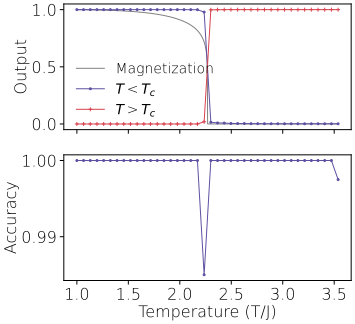

In [15]:
fig,ax = plt.subplots(2,1, sharex=True, figsize=(5,5))

lT = np.linspace(T[0], T[-1], 1000)
ax[0].plot(lT,magnetization_exact(lT), '-', linewidth=1, label='Magnetization', color='gray')

ax[0].plot(T,ave_output[:,1], marker='.', label=r'$T < T_c$', color=colors[0], markersize=4, linewidth=1)
ax[0].plot(T,ave_output[:,0], marker='+', label=r'$T > T_c$', color=colors[8], markersize=4, linewidth=1)
ax[0].set_ylabel('Output')
ax[0].legend()


ax[1].plot(T,ave_accuracy, marker='.', color=colors[0], markersize=4, linewidth=1)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Temperature (T/J)')

# 2

In [16]:
c=[]
temp=[]
c.append(np.loadtxt('../data/Ising2D_config_L20.dat.gz'))
c.append(np.loadtxt('../data/Ising2D_config_L40.dat.gz'))
c.append(np.loadtxt('../data/Ising2D_config_L80.dat.gz'))
temp.append(np.loadtxt('../data/Ising2D_temps_L20.dat'))
temp.append(np.loadtxt('../data/Ising2D_temps_L40.dat'))
temp.append(np.loadtxt('../data/Ising2D_temps_L80.dat'))

In [17]:
import scipy.linalg
E = []
N = []
L = []
V = []
for i in range(3):
    N.append(c[i].shape[0])
    c[i] -= np.average(c[i],axis=0)
    E.append(c[i].T @ c[i] / (N[i]-1))
    L_t,V_t = scipy.linalg.eigh(E[i])
    L.append(L_t)
    V.append(V_t)

In [18]:
for i in range(3):
    L[i] = L[i][::-1]
    V[i] = np.flip(V[i],axis=1)
pix = []
for i in range(3):
    pix.append(c[i] @ V[i])

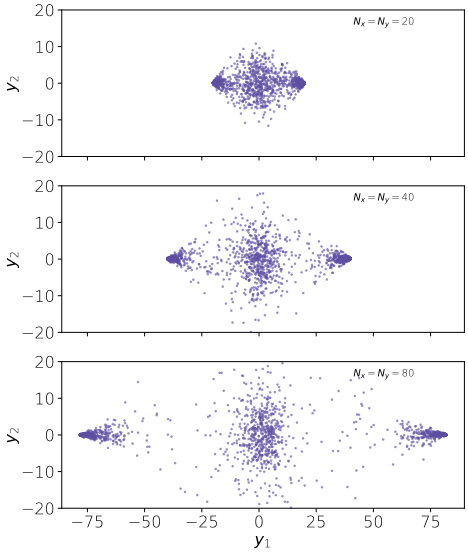

In [19]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(7,9))
nn = ['20','40','80']
ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-20,20])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    ax[i].scatter(pix[i][:,0],pix[i][:,1], s=3, alpha=0.5)

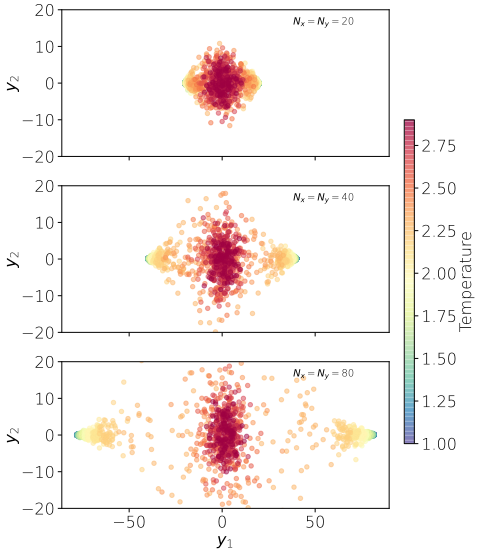

In [20]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(7,9))

ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-20,20])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    scat = ax[i].scatter(pix[i][:,0],pix[i][:,1],c=temp[i],cmap='Spectral_r', s=20, alpha=0.5)

fig.subplots_adjust(right=0.8) 
cbar_ax=fig.add_axes([0.83, 0.25, 0.02, 0.5])
cbar = fig.colorbar(scat,cax=cbar_ax,label='Temperature')

In [21]:
eigsum = np.zeros((3))

for i in range(3):
    eigsum[i]=np.sum(L[i][0:9])
var = np.zeros((3,10))
for i in range(3):
    for k in range(10):
        var[i,k]=L[i][k]/eigsum[i]

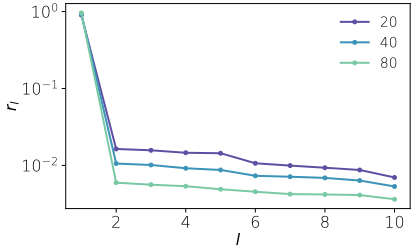

In [22]:
for i in range(3):
    plt.semilogy(range(1,11),var[i,:],color=colors[i],markersize=4,marker='o')
plt.xlabel('$l$')
plt.ylabel('$r_l$')
plt.legend(['20', '40','80'], loc='best');